In [1]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [2]:
#Images path(dataset path)
data_dir = 'vehicle_types'

In [3]:
# Load images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


# Training data
train_data = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

#validation data
validation_data = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [4]:
#checking classes
vehicle_types_names = list(train_data.class_indices.keys())
print(vehicle_types_names)


['bus', 'car', 'motorcycle', 'truck']


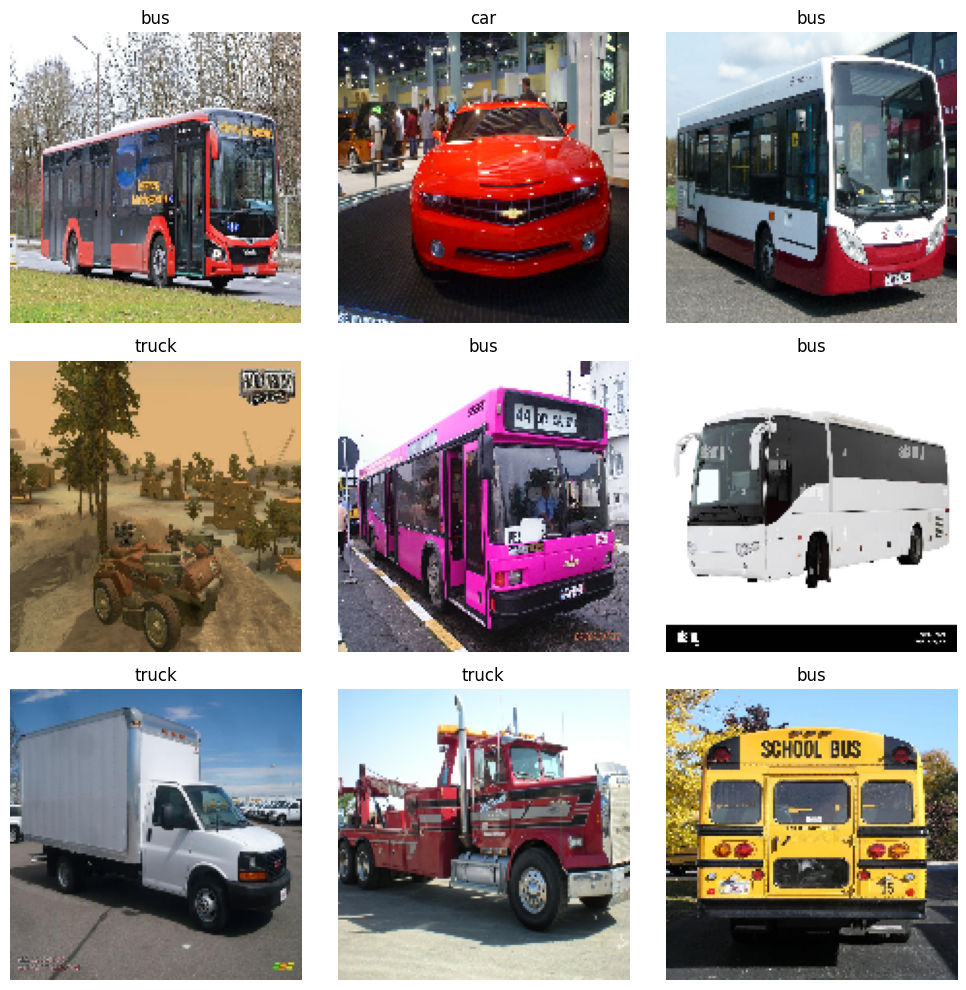

In [5]:
# showing sample images in train data
plt.figure(figsize=(10, 10))
images, labels = next(train_data)
images = images * 255.0

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype('uint8'))
    plt.title(list(train_data.class_indices.keys())[np.argmax(labels[i])])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
#Build the model
model = Sequential([
    Input(shape=(150, 150, 3)),  # Specify the input shape using Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Handle the warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

In [10]:
#Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2408 - loss: 2.3538 - val_accuracy: 0.2500 - val_loss: 1.3833
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 992ms/step - accuracy: 0.3397 - loss: 1.3664 - val_accuracy: 0.5125 - val_loss: 1.2802
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5151 - loss: 1.2059 - val_accuracy: 0.4750 - val_loss: 1.1024
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 943ms/step - accuracy: 0.6611 - loss: 0.8461 - val_accuracy: 0.5375 - val_loss: 1.1173
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 913ms/step - accuracy: 0.7772 - loss: 0.6497 - val_accuracy: 0.6250 - val_loss: 1.0002
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8162 - loss: 0.5240 - val_accuracy: 0.6875 - val_loss: 0.8808
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1000ms/step - accuracy: 0.8817 - loss: 0.3231 - val_accuracy: 0.6125 - val_loss: 0.9867
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 986ms/step - accuracy: 0.9581 - loss: 0.1636 - val_accuracy: 0.

In [13]:
# Load and preprocess the image for prediction
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [14]:
#function for predict the vehicle type
def predict_vehicle_type(image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=1)
    
    vehicle_type = vehicle_types_names[predicted_class[0]]
    
    return vehicle_type, prediction

In [15]:
image_path = 'Test_images/image_3.jpeg'
vehicle_type, prediction_probs = predict_vehicle_type(image_path)

print(f"Predicted vehicle type: {vehicle_type}")
for i, class_name in enumerate(vehicle_types_names):
    print(f"{class_name}: {prediction_probs[0][i]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted vehicle type: car
bus: 0.00%
car: 100.00%
motorcycle: 0.00%
truck: 0.00%


In [16]:
#save the model
model.save('vehicle_type_identifier_model.keras')